# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home.

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart ways to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [ ]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import os

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/AI_ph2

/content/drive/MyDrive/AI_ph2


# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [ ]:
# Load the dataset for training
train_df = pd.read_json('Data/output.json')
train_df

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48
...,...,...,...,...,...,...,...,...,...
17989,59,0,35.950,51.225,35.875,51.125,2024-01-30 06:41:00,2024-01-30 07:07:00,10.92
17990,59,0,35.875,51.125,35.690,51.295,2024-01-30 12:46:00,2024-01-30 13:35:00,17.35
17991,59,0,35.875,51.125,35.525,51.100,2024-01-30 17:39:00,2024-01-30 18:48:00,34.56
17992,59,0,35.525,51.100,35.815,51.320,2024-01-30 20:09:00,2024-01-30 21:19:00,36.80


In [ ]:
# Load the dataset for testing
test_df = pd.read_json('Data/output_test.json')
test_df

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08
...,...,...,...,...,...,...,...,...,...
4494,32,3,35.775,51.400,35.875,51.250,2024-01-30 07:11:00,2024-01-30 07:51:00,27.15
4495,36,1,35.625,51.125,35.735,51.200,2024-01-30 17:08:00,2024-01-30 17:38:00,10.78
4496,40,2,36.000,51.085,35.545,51.145,2024-01-30 22:13:00,2024-01-30 23:43:00,43.47
4497,19,3,35.875,51.125,35.840,51.130,2024-01-30 17:33:00,2024-01-30 18:03:00,19.37


In [ ]:
# print out the number of unique users and also randomly select one user
print('number of unique users :', train_df['user_id'].nunique())
random_user_id = random.choice(list(set(train_df['user_id'])))
random_user_id

number of unique users : 60


30

In [ ]:
!pip install keplergl
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data

random_user_des = train_df[train_df['user_id'] == random_user_id][['dest lat', 'dest lon']]
random_user_des

,dest lat,dest lon
8883,35.875,51.375
8884,35.775,51.400
8885,35.875,51.375
8886,35.525,51.100
8887,35.805,51.345
...,...,...
9156,35.775,51.400
9157,35.745,51.465
9158,35.775,51.400
9159,35.745,51.465


In [ ]:
# Sample output:
map_kepler = KeplerGl(height=600)
map_kepler.add_data(data=random_user_des, name='Tehran')
map_kepler

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Tehran': {'index': [8883, 8884, 8885, 8886, 8887, 8888, 8889, 8890, 8891, 8892, 8893, 8894, 88…

<div align="center">
  <img src="images/1.png" width="1200" height="600">
</div>

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [ ]:
def calculate_accuracy(Y, Y_hat) :
    count = 0
    for i in range(Y.shape[0]) :
        if Y[i][0] == Y_hat[i][0] and Y[i][1] == Y_hat[i][1] :
            count += 1

    return count / Y.shape[0]

In [ ]:
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess(df, normalizer, is_train_set) :
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])

    df['start_year'] = df['start_time'].dt.year
    df['start_month'] = df['start_time'].dt.month
    df['start_day'] = df['start_time'].dt.day
    df['start_hour'] = df['start_time'].dt.hour
    df['start_minute'] = df['start_time'].dt.minute

    df['end_year'] = df['end_time'].dt.year
    df['end_month'] = df['end_time'].dt.month
    df['end_day'] = df['end_time'].dt.day
    df['end_hour'] = df['end_time'].dt.hour
    df['end_minute'] = df['end_time'].dt.minute

    X = np.array(df.drop(['start_time', 'end_time', 'dest lat', 'dest lon', 'price'], axis=1).values)
    Y = np.array(df[['dest lat', 'dest lon']].values)

    if is_train_set :
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)
        X_train = normalizer.fit_transform(X_train)
        X_val = normalizer.transform(X_val)
        return (X_train, Y_train, X_val, Y_val)
    else :
        X = normalizer.transform(X)
        return (X, Y)

In [ ]:
# print out the shape of the train and test dataframes
normalizer = StandardScaler()
X_train, Y_train, X_val, Y_val = preprocess(train_df.copy(), normalizer, True)
X_test, Y_test = preprocess(test_df.copy(), normalizer, False)

print((X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape))

((13495, 14), (13495, 2), (4499, 14), (4499, 2), (4499, 14), (4499, 2))


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [ ]:
# Define the model
from collections import Counter

class NearestNeighbor():
    def __init__(self, k, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.k = k

    def fit(self, train_X, train_y):
        # KNN algorithm does not need any training process
        return

    def find_most_repetitive_label(self, labels):
        labels = [(label[0], label[1]) for label in labels]
        label_counts = Counter(labels)
        return max(label_counts, key=label_counts.get)

    def predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indexes = np.argsort(distances)[:self.k]
        k_nearest_Ys = [self.Y_train[i] for i in k_indexes]
        prediction = list(self.find_most_repetitive_label(k_nearest_Ys))
        return prediction

    def prediction_loop(self, X) :
        predictions = []
        for x in X :
            predictions.append(self.predict(x))
        return np.array(predictions)

In [ ]:
# Fit the model on training data
X_train_knn = np.vstack((X_train, X_val))
Y_train_knn = np.vstack((Y_train, Y_val))
knn_model = NearestNeighbor(3, X_train_knn, Y_train_knn)

### Hyper Parameter Tuning

In [ ]:
# for k in range(2,8) :
#     knn_model.set_k(k)
#     pred_train = knn_model.predict(X_train)
#     pred_val = knn_model.predict(X_val)
#     print(f'train accuracy (k={k}) :', calculate_accuracy(Y_train, pred_train))
#     print(f'val accuracy (k={k}) :', calculate_accuracy(Y_val, pred_val))

In [ ]:
pred_train = knn_model.prediction_loop(X_train_knn)
pred_test = knn_model.prediction_loop(X_test)

In [ ]:
print(f'train accuracy (k={3}) :', calculate_accuracy(Y_train_knn, pred_train))
print(f'test accuracy (k={3}) :', calculate_accuracy(Y_test, pred_test))

train accuracy (k=3) : 0.914971657219073
test accuracy (k=3) : 0.42853967548344074


**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: KNN is a simple model for machine learning problems. As we can see, the model performed reasonably good on train set, although it performed poorly on test set. So these numbers indicate that our model is facing overfitting problem and it is sensible because our predictions are based on training set (i mean like a classification task we look at train set labels and based on distances, the output is decided). The only way to resolve this problem in KNN is adding more data which is not always feasible and the reason for this is because KNN uses a simple learning algorithm and does not have lots of hyper parameters to tune. Therefore, i think using KNN for this task is not a good idea since there are not many strategies to improve the model.

If the patterns in our dataset get more complicated, i think our training accuracy will fall like our test accuracy and the model will underfit because KNN is not very useful for complicated functions. It only uses clusters(it is not very accurate term in this case) in the data in order to predict and if we face near points with different classes, KNN won't do much to distinguish them.

Also it worths to mention that the prediction process is dependent to the number of training set size, so the larger the dataset is, the much time needed for prediction.

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [ ]:
%pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

class Encoder:
    def __init__(self):
        self.label_map = {}
        self.inverse_label_map = {}
        self.label_encoder = LabelEncoder()

    def get_lat_lon_tuple(self, arr) :
        return [tuple(row) for row in arr]

    def fit(self, Y):
        unique_labels = set(self.get_lat_lon_tuple(Y))
        for i, label in enumerate(unique_labels) :
            self.label_map[label] = i
            self.inverse_label_map[i] = label

    def transform(self, Y):
        labels = self.get_lat_lon_tuple(Y)
        transformed_labels = [self.label_map[label] for label in labels]
        return transformed_labels

    def inverse_transform(self, enc):
        transformed_labels = [self.inverse_label_map[enc_label] for enc_label in enc]
        decoded_labels = [[label[0], label[1]] for label in transformed_labels]
        return np.array(decoded_labels)

In [ ]:
encoder = Encoder()
encoder.fit(Y_train)

In [ ]:
# transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier()

In [ ]:
classifier.fit(X_train, encoder.transform(Y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
pred_train = classifier.predict(X_train)
print('train accuracy :', calculate_accuracy(Y_train, encoder.inverse_transform(pred_train)))

train accuracy : 0.9999258984809188


In [ ]:
pred_val = classifier.predict(X_val)
print('val accuracy :', calculate_accuracy(Y_val, encoder.inverse_transform(pred_val)))

val accuracy : 0.6910424538786397


In [ ]:
pred_test = classifier.predict(X_test)
print('test accuracy :', calculate_accuracy(Y_test, encoder.inverse_transform(pred_test)))

test accuracy : 0.6817070460102245


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: Well, XGBoost is an implementation of gradient boosting which is an algorithm that uses several predictors which are attached to each other sequentially and each one corrects its previous predictor's residual error. It provides lots of hyper parameters unlike KNN. Based on our accuracies, the model is overfitting. However, it is still performing better on validation and test set than KNN.  I think it is a good idea to use XGBoost model for these reasons :
1. It is significantly fast.
2. it has a lot of parameters and since we are overfitting, there is a hope to improve the model and reach somewhere between underfit and overfit.

If the patterns in our dataset get more complicated, i think the model still can capture complex patterns since it can start with poor models and gradually improve the performance. However, this needs hyperparameter tuning. Notice that XGBoost is limited to convex loss functions, which may not be suitable for specific applications and datasets that require non-convex loss functions

I will explain the problem of overfitting in the next question.  

**Question:** Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Overfitting is a common problem in XGBoost, like any other algorithm. Several factors can contribute to XGBoost overfitting:

- If the training data is limited, the model may not capture the underlying patterns effectively, leading to overfitting.

- Setting a high number of trees can cause overfitting as the model starts to incorporate noisy details from the training data.

- Allowing the trees to grow excessively deep enables them to memorize the training data instead of learning general patterns, resulting in poor performance on unseen data. Overfitting can also occur if the learning rate (eta) is too large or if other parameters are inappropriately set.

- When the training set is small or lacks diversity, the model may memorize the examples instead of capturing the underlying patterns, leading to poor generalization.

- XGBoost may prioritize the majority class and neglect the minority class if the dataset is imbalanced, affecting the model's performance.

- In high-dimensional data, incorporating irrelevant or noisy features can lead to overfitting. Addressing this issue may involve feature selection or dimensionality reduction techniques.

In our case, potential reasons for overfitting include having 100 trees, a regularization parameter of 1, a gamma value of 0, and also the size of the training set and the dataset's imbalance (which needs to be checked).

To solve overfitting in XGBoost, the following solutions can be employed:

- Regularization: Increasing the "alpha" and "lambda" values enhances regularization and helps overcome overfitting.

- Parameter Tuning: Fine-tuning other hyperparameters of the model can significantly reduce overfitting, such as adjusting the learning rate, subsample ratio, and column subsampling.

- Early Stopping: Monitoring the model's performance on a validation set and stopping the training when the performance plateaus can prevent the model from overfitting.

- Feature Selection: Identifying and selecting relevant features can reduce the model's complexity and prevent the incorporation of irrelevant or noisy information.

- Increasing Training Data: Obtaining more training data can provide a more representative sample and help mitigate overfitting issues.

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [ ]:
# load the training dataset
nn_train_df = pd.read_json('Data/trip_data.json')
nn_train_df

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48
...,...,...,...,...,...,...,...
17989,59,0,"[home, [35.95, 51.225]]","[work, [35.875, 51.125]]",2024-01-30 06:41:00,2024-01-30 07:07:00,10.92
17990,59,0,"[work, [35.875, 51.125]]","[restaurant, [35.69, 51.295]]",2024-01-30 12:46:00,2024-01-30 13:35:00,17.35
17991,59,0,"[work, [35.875, 51.125]]","[pool, [35.525, 51.1]]",2024-01-30 17:39:00,2024-01-30 18:48:00,34.56
17992,59,0,"[pool, [35.525, 51.1]]","[restaurant, [35.815, 51.32]]",2024-01-30 20:09:00,2024-01-30 21:19:00,36.80


In [ ]:
# load the test dataset
nn_test_df = pd.read_json('Data/trip_data_test.json')
nn_test_df

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08
...,...,...,...,...,...,...,...
4494,32,3,"[home, [35.775, 51.4]]","[university, [35.875, 51.25]]",2024-01-30 07:11:00,2024-01-30 07:51:00,27.15
4495,36,1,"[work, [35.625, 51.125]]","[home, [35.735, 51.2]]",2024-01-30 17:08:00,2024-01-30 17:38:00,10.78
4496,40,2,"[restaurant, [36.0, 51.085]]","[home, [35.545, 51.145]]",2024-01-30 22:13:00,2024-01-30 23:43:00,43.47
4497,19,3,"[work, [35.875, 51.125]]","[home, [35.84, 51.13]]",2024-01-30 17:33:00,2024-01-30 18:03:00,19.37


In [ ]:
def spliting_columns(df) :
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])

    df['start_time'] = df['start_time'].dt.time
    df['end_time'] = df['end_time'].dt.time

    df['Origin Lat'] = df['origin'].apply(lambda x: x[1][0])
    df['Origin Long'] = df['origin'].apply(lambda x: x[1][1])
    df['Dest Lat'] = df['destination'].apply(lambda x: x[1][0])
    df['Dest Long'] = df['destination'].apply(lambda x: x[1][1])
    df['origin'] = df['origin'].apply(lambda x: x[0])
    df['destination'] = df['destination'].apply(lambda x: x[0])
    return df

In [ ]:
nn_train_df = spliting_columns(nn_train_df.copy())
nn_train_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
0,0,0,work,restaurant,13:07:00,14:43:00,43.99,35.625,51.375,36.000,51.085
1,0,0,restaurant,work,15:13:00,16:49:00,36.66,36.000,51.085,35.625,51.375
2,0,0,home,restaurant,20:41:00,20:54:00,15.08,35.680,51.445,35.745,51.465
3,0,0,restaurant,home,21:24:00,21:37:00,10.00,35.745,51.465,35.680,51.445
4,0,1,work,home,23:38:00,23:58:00,19.48,35.625,51.375,35.680,51.445


In [ ]:
nn_test_df = spliting_columns(nn_test_df.copy())
nn_test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
0,24,6,pool,home,11:58:00,12:12:00,10.00,35.650,51.225,35.640,51.270
1,46,2,university,restaurant,21:58:00,22:18:00,11.84,35.625,51.250,35.690,51.295
2,27,5,pool,restaurant,20:05:00,20:58:00,23.36,35.650,51.225,35.865,51.045
3,7,4,work,home,17:39:00,18:17:00,13.74,35.875,51.375,35.890,51.315
4,27,3,work,restaurant,13:16:00,13:19:00,15.08,35.625,51.375,35.650,51.385


In [ ]:
for column_name, column_data in nn_train_df.items() :
    print('Column:', column_name)
    print('Unique values:')
    print(', '.join(map(str, list(column_data.unique()))))
    print('========================================')


Column: user_id
Unique values:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59
Column: Day
Unique values:
0, 1, 2, 3, 4, 6, 5
Column: origin
Unique values:
work, restaurant, home, park, university, gym, pool
Column: destination
Unique values:
restaurant, work, home, park, university, gym, pool
Column: start_time
Unique values:
13:07:00, 15:13:00, 20:41:00, 21:24:00, 23:38:00, 07:59:00, 21:19:00, 07:55:00, 14:11:00, 20:08:00, 21:03:00, 07:00:00, 13:50:00, 14:23:00, 21:40:00, 22:28:00, 20:28:00, 22:01:00, 12:05:00, 12:54:00, 17:29:00, 13:44:00, 14:59:00, 17:36:00, 07:49:00, 20:40:00, 22:21:00, 17:33:00, 21:51:00, 07:54:00, 13:35:00, 16:30:00, 22:35:00, 08:19:00, 11:24:00, 08:56:00, 12:17:00, 07:06:00, 07:42:00, 13:15:00, 13:53:00, 21:20:00, 07:51:00, 12:37:00, 13:40:00, 17:32:00, 20:46:00, 21:38:00, 22:07:00, 

In [ ]:
import pandas as pd

# print out the data type of each column
for column_name, column_data in nn_train_df.items() :
    print('column:', column_name)
    print('Data type:', nn_train_df[column_name].dtype)
    print('-------------------------------')

column: user_id
Data type: int64
-------------------------------
column: Day
Data type: int64
-------------------------------
column: origin
Data type: object
-------------------------------
column: destination
Data type: object
-------------------------------
column: start_time
Data type: object
-------------------------------
column: end_time
Data type: object
-------------------------------
column: price
Data type: float64
-------------------------------
column: Origin Lat
Data type: float64
-------------------------------
column: Origin Long
Data type: float64
-------------------------------
column: Dest Lat
Data type: float64
-------------------------------
column: Dest Long
Data type: float64
-------------------------------


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Finalize the data (do all preprocessing needed)
def preprocess_nn_df(df, normalizer, feature_encoder, label_encoder, is_train_set):
    df = df.reset_index(drop=True)
    # preprocess the time series columns
    df['start_hour'] = df['start_time'].apply(lambda x: x.hour)
    df['start_minute'] = df['start_time'].apply(lambda x: x.minute)

    df['end_hour'] = df['end_time'].apply(lambda x: x.hour)
    df['end_minute'] = df['end_time'].apply(lambda x: x.minute)

    combined_column = pd.concat([df['origin'], df['destination']])

    if is_train_set:
        # encoding the string columns
        feature_encoder.fit(combined_column.values.reshape(-1, 1))
        label_encoder.fit(df['destination'].values.reshape(-1, 1))

    origin_encoded = feature_encoder.transform(df['origin'].values.reshape(-1, 1))
    df_origin_encoded = pd.DataFrame(origin_encoded, columns=feature_encoder.categories_[0])

    df['destination'] = label_encoder.transform(df['destination'].values.reshape(-1, 1))

    df_origin_encoded = df_origin_encoded.reset_index(drop=True)

    df_encoded = pd.concat([df, df_origin_encoded], axis=1)

    X = np.array(df_encoded.drop(['origin', 'destination', 'start_time', 'end_time', 'Dest Lat', 'Dest Long', 'price', 'end_hour', 'end_minute'], axis=1).values)
    Y = np.array(df_encoded['destination'].values.reshape(-1, 1))

    if is_train_set:
        # dividing the data into train and validation
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)
        # normalizing
        normalizer.fit(X_train)
        X_train = normalizer.transform(X_train)
        X_val = normalizer.transform(X_val)
        return X_train, Y_train, X_val, Y_val

    else:
        X = normalizer.transform(X)
        return X, Y

In [ ]:
feature_encoder = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()
normalizer = StandardScaler()

X_train, Y_train, X_val, Y_val = preprocess_nn_df(nn_train_df.copy(), normalizer, feature_encoder, label_encoder,True)
X_test, Y_test = preprocess_nn_df(nn_test_df.copy(), normalizer, feature_encoder, label_encoder, False)

In [ ]:
print((X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape))

((13495, 13), (13495, 1), (4499, 13), (4499, 1), (4499, 13), (4499, 1))


Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

class DataSet(Dataset) :
    def __init__(self, X, Y) :
        super().__init__()
        self.X = X
        self.Y = Y

    def __len__(self) :
        return len(self.X)

    def __getitem__(self, index) :
        return self.X[index], self.Y[index]


train_dataset = DataSet(X_train, Y_train)
val_dataset = DataSet(X_val, Y_val)
test_dataset = DataSet(X_test, Y_test)

# Batch size
batch_size = 135

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Implement the train_model function
def train_step(model, train_loader, criterion, optimizer) :
    model.train()
    number_of_batches = 0
    total_loss = 0
    for X, Y in train_loader :
        X = X.to(device).type(model.parameters().__next__().dtype)
        Y = Y.to(device).type(model.parameters().__next__().dtype)

        predictions = model(X)

        loss = criterion(predictions, Y.squeeze(1).long())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        number_of_batches += 1
        total_loss += loss.item()

    return total_loss / number_of_batches

def validation_step(model, val_loader, criterion) :
    model.eval()
    number_of_batches = 0
    total_loss = 0
    with torch.no_grad() :
        for X, Y in val_loader :
            X = X.to(device).type(model.parameters().__next__().dtype)
            Y = Y.to(device).type(model.parameters().__next__().dtype)

            predictions = model(X)

            loss = criterion(predictions, Y.squeeze(1).long())

            number_of_batches += 1
            total_loss += loss.item()

    return total_loss / number_of_batches

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    # training loop
    training_losses = []
    validation_losses = []
    for epoch in range(epochs) :
        train_loss = train_step(model, train_loader, criterion, optimizer)
        val_loss = validation_step(model, val_loader, criterion)

        training_losses.append(train_loss)
        validation_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}')


    # Plot training and validation losses
    plt.plot(training_losses, label='training loss')
    plt.plot(validation_losses, label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc='best')
    plt.show()

# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 52)
        nn.init.xavier_uniform_(self.linear1.weight)
        self.relu_h1 = nn.ReLU()
        self.linear2 = nn.Linear(52, 50)
        nn.init.xavier_uniform_(self.linear2.weight)
        self.relu_h2 = nn.ReLU()
        self.linear3 = nn.Linear(50, num_classes)
        nn.init.xavier_uniform_(self.linear3.weight)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu_h1(x)
        x = self.linear2(x)
        x = self.relu_h2(x)
        x = self.linear3(x)
        return x


# Define Model, Loss, Optimizer
model = MLP(X_train.shape[1], len(label_encoder.classes_), 1)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0022)

Epoch 1/120, Train Loss: 1.0315810072422027, Val Loss: 0.6558127911651835
Epoch 2/120, Train Loss: 0.5935743591189384, Val Loss: 0.5225698921610328
Epoch 3/120, Train Loss: 0.5013943564891815, Val Loss: 0.45450351168127623
Epoch 4/120, Train Loss: 0.4439856803417206, Val Loss: 0.4100331287173664
Epoch 5/120, Train Loss: 0.4050242778658867, Val Loss: 0.37698447309872685
Epoch 6/120, Train Loss: 0.3759895995259285, Val Loss: 0.3558686244137147
Epoch 7/120, Train Loss: 0.3569209410250187, Val Loss: 0.348561555147171
Epoch 8/120, Train Loss: 0.3484616602957249, Val Loss: 0.33187825232744217
Epoch 9/120, Train Loss: 0.3359624879062176, Val Loss: 0.3245177225154989
Epoch 10/120, Train Loss: 0.3276320144534111, Val Loss: 0.316011266235043
Epoch 11/120, Train Loss: 0.3221117541193962, Val Loss: 0.31126293802962585
Epoch 12/120, Train Loss: 0.3180805225670338, Val Loss: 0.3009757631841828
Epoch 13/120, Train Loss: 0.30920475855469703, Val Loss: 0.3113446402199128
Epoch 14/120, Train Loss: 0.303

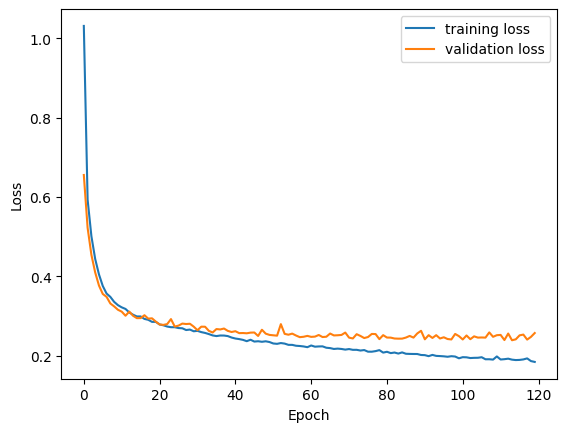

In [ ]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=120)

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [ ]:
# report model accuracy on test data
def eval_model(model, data_loader) :
    model.eval()
    correct_predictions = 0
    total_samples = 0
    predictions_list = []

    with torch.no_grad() :
        for X, Y in data_loader :
            X = X.to(device).type(model.parameters().__next__().dtype)
            Y = Y.to(device).type(model.parameters().__next__().dtype)

            predictions = model(X)
            predictions_list.append(predictions)
            predicted_classes = torch.argmax(predictions, dim=1)
            correct_predictions += (predicted_classes == Y.squeeze(1)).sum().item()
            total_samples += Y.size(0)
    return correct_predictions / total_samples, predictions

In [ ]:
accuracy, _ = eval_model(model, train_loader)
print(f'Train accuracy: {accuracy * 100:.4f}')

Train accuracy: 92.2268


In [ ]:
accuracy, _ = eval_model(model, val_loader)
print(f'Val accuracy: {accuracy * 100:.4f}')

Val accuracy: 89.5310


In [ ]:
accuracy, _ = eval_model(model, test_loader)
print(f'Accuracy: {accuracy * 100:.4f}')

Accuracy: 90.1311


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [ ]:
import random
# TODO: choose a random sample from test data and print it out
random_row = nn_test_df.sample(n=1)
random_row

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
1607,10,0,work,home,16:22:00,16:48:00,22.81,35.625,51.375,35.535,51.305


In [ ]:
x, y = preprocess_nn_df(random_row.copy(), normalizer, feature_encoder, label_encoder, False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
sample = DataSet(x, y)
sample_loader = DataLoader(sample, batch_size=1)
accuracy, prediction = eval_model(model, sample_loader)

In [ ]:
# predict the destination of the above sample
# print out the prediction
pred = torch.argmax(prediction)
print(f'Prediction: {pred}')

Prediction: 1


In [ ]:
# print out the actual destination of the above sample
print(f'Actual: {sample[0][1][0]}')

Actual: 1


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [ ]:
# use inverse_transform to print out the actual name of destination of the above sample
print(f'Name of predicted destination: {label_encoder.inverse_transform([pred.numpy().tolist()])[0]}')

Name of predicted destination: home


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: As we can see, Neural Networks (NN) outperformed the other two algorithms and show good generalization, indicating they are a good choice for this problem. NNs are suitable for learning complex and non-linear functions, and by choosing a suitable structure and loss function, they can explore a vast hypothesis space.

If the patterns in our dataset become more complicated, NNs can still perform well by adjusting the structure, such as adding more layers or neurons to the model and considering different optimization algorithms or loss functions.